### Import essential libraries

In [1]:
import pandas as pd
from sail.models.keras import WGLSTM
from sail.utils.ts_utils import generate_features_and_targets
from sail.visualisation.ts_plot import plot_series

### Import time-series dataset

In [2]:
df = pd.read_csv(
    "/Users/dhaval/Projects/onlineLearning/data/household_power_consumption.txt",
    sep=",",
)[4600:5500]

df.head()

/var/folders/p_/rdt928015ggfw5jzyg1qnj6m0000gn/T/ipykernel_44336/2402221253.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
4600,19/12/2006,22:04:00,1.012,0.094,239.750,4.200,0.000,0.000,0.0
4601,19/12/2006,22:05:00,0.994,0.000,240.080,4.000,0.000,0.000,0.0
4602,19/12/2006,22:06:00,0.988,0.000,240.910,4.000,0.000,1.000,0.0
4603,19/12/2006,22:07:00,0.970,0.000,240.930,4.000,0.000,0.000,0.0
4604,19/12/2006,22:08:00,1.102,0.000,242.240,4.400,0.000,0.000,0.0


#### Generate features and targets with a lag of 1

In [3]:
X, y = generate_features_and_targets(df, "Global_active_power")

#### Create model and call partial_fit() on features and targets.

In [4]:
num_of_features = 1
timesteps = 1
window_size = 20

model = WGLSTM(
    loss="mse",
    epochs=1,
    verbose=1,
    num_of_features=num_of_features,
    hidden_layer_neurons=450,
    hidden_layer_activation="linear",
    regularization_factor=0.0001,
    timesteps=timesteps,
    window_size=window_size,
)

model.partial_fit(X, y)

2022-04-03 15:18:42.026621: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


suspicous points at  41 :  1.0 0.14800000000000002 1 1.4400000000000004 2.0555555555555554
suspicous points at  270 :  0.35212156712978504 0.906 1 0.8680000000000005 20.875576036866345
suspicous points at  271 :  0.7707921409481482 0.22799999999999998 2 0.8320000000000005 5.206730769230766
suspicous points at  272 :  1.0 0.04800000000000004 3 0.7920000000000005 1.0909090909090913
suspicous points at  273 :  1.0 0.03200000000000003 4 0.7520000000000004 0.7234042553191491
suspicous points at  274 :  1.0 0.016000000000000014 5 0.7120000000000004 0.3595505617977529
suspicous points at  275 :  1.0 0.08400000000000007 6 0.6760000000000004 1.8639053254437876
suspicous points at  276 :  1.0 0.020000000000000018 7 0.6400000000000003 0.4375000000000001
suspicous points at  277 :  1.0 0.026000000000000023 8 0.6040000000000003 0.5596026490066227
suspicous points at  278 :  1.0 0.02200000000000002 9 0.5680000000000003 0.46478873239436636
suspicous points at  279 :  1.0 0.018000000000000016 10 0.532

/Users/dhaval/Projects/MORE/sail/sail/models/scikeras/wglstm.py:366: RuntimeWarning: divide by zero encountered in double_scalars
  r2 = 1.0 * sum(suspDiff) * len(normDiff) / sum(normDiff) / len(suspDiff)
/Users/dhaval/Projects/MORE/sail/sail/models/scikeras/wglstm.py:371: RuntimeWarning: divide by zero encountered in double_scalars
  tmpr = pnt_diff * 1.0 / (sum(normDiff) / len(normDiff))
/Users/dhaval/Projects/MORE/sail/sail/models/scikeras/wglstm.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  testval = point_diff * 1.0 / (sum(norm_diff) / len(norm_diff))


suspicous points at  601 :  1.0 0.014000000000000234 20 0.0 inf
suspicous points at  602 :  1.0 0.06400000000000006 20 0.0 inf
suspicous points at  603 :  1.0 0.15600000000000058 20 0.0 inf
suspicous points at  604 :  1.0 0.04999999999999982 20 0.0 inf
suspicous points at  605 :  1.0 0.040000000000000036 20 0.0 inf
suspicous points at  606 :  1.0 0.0019999999999997797 20 0.0 inf
suspicous points at  612 :  1.0 2.6300000000000003 15 3.620000000000001 3.6325966850828726
suspicous points at  613 :  1.0 0.1759999999999997 15 3.620000000000001 0.24309392265193325
suspicous points at  614 :  1.0 0.28000000000000025 15 3.620000000000001 0.38674033149171294
suspicous points at  615 :  1.0 0.31000000000000005 15 3.620000000000001 0.42817679558011046
suspicous points at  616 :  1.0 0.08599999999999985 15 3.620000000000001 0.1187845303867401
suspicous points at  770 :  0.15905653479347379 1.662 1 0.9040000000000004 36.76991150442476
suspicous points at  771 :  1.0 0.09600000000000009 2 0.78800000

WGLSTM(
	model=<sail.models.scikeras.wglstm._Model object at 0x138196c70>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=<keras.optimizer_v2.gradient_descent.SGD object at 0x135af70d0>
	loss=mse
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
)

#### Create test dataset and call predict on the trained model.

In [ ]:
df_test = pd.read_csv(
    "/Users/dhaval/Projects/onlineLearning/data/household_power_consumption.txt",
    sep=",",
)[6000:6500]

X_test, y_test = generate_features_and_targets(df_test, "Global_active_power")

#### Make Prediction

In [9]:
y_pred = model.predict(X_test, batch_size=1)

/var/folders/p_/rdt928015ggfw5jzyg1qnj6m0000gn/T/ipykernel_44336/1880657847.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv(


499/499 [==============================] - 1s 2ms/step


#### Plot predicted values

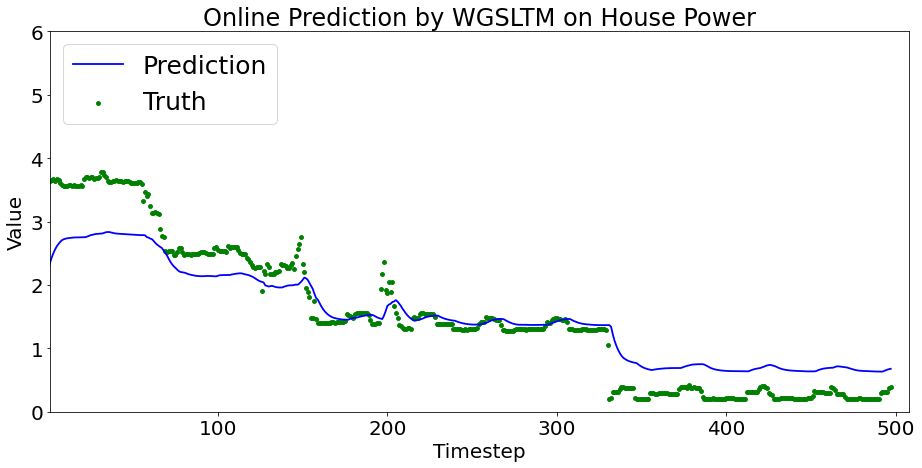

In [10]:
y_pred = y_pred.flatten().flatten()[:-1]
y_orig = y_test.flatten().flatten()[1:]

plot_series(y_orig, y_pred, ybound=[0, 6] "Online Prediction by WGSLTM on House Power")